In [66]:
import nltk
import string

from collections import Counter

def get_tokens():
   with open('tokenized_stems.csv', 'r') as shakes:
    text = shakes.read()
    lowers = text.lower()
    #remove the punctuation using the character deletion step of translate
    no_punctuation = lowers.translate(None, string.punctuation)
    no_apos = no_punctuation.translate(None, "'")
    tokens = nltk.word_tokenize(no_apos)
    return tokens

tokens = get_tokens()
for i in range(115771):
    tokens[i]=tokens[i][1:]
count = Counter(tokens)
#print count.most_common(10)

In [65]:
from nltk.corpus import stopwords

filtered = [w for w in tokens if not w in stopwords.words('english')]
count_filt = Counter(filtered)
#print count_filt.most_common(100)

In [44]:
import csv
csvfile='filtered.csv'
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in filtered:
        writer.writerow([val])   

In [ ]:
''''''

In [ ]:
                    '''loading tf_idf matrix and showing distance among documents'''

In [ ]:
''''''

In [1]:
import csv
import numpy as np
reader = csv.reader(open("tfidf_mat.csv", "rb"), delimiter=" ")
x = list(reader)
X = np.array(x).astype("float")

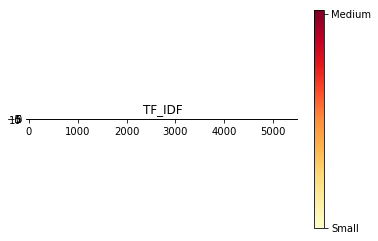

In [18]:
import matplotlib.pyplot as plt
from matplotlib import cm
# Make plot with horizontal colorbar
fig, ax = plt.subplots()

#print X
#print len(X)/244.
dataALL = X.reshape((244, 5492))
data= dataALL[0:10][0:20]
#dist.

cax = ax.imshow(data, interpolation='nearest', cmap=cm.YlOrRd)#cm.afmhot)
ax.set_title('TF_IDF')

cbar = fig.colorbar(cax, ticks=[0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['Small', 'Medium', 'Large'])  # horizontal colorbar

plt.savefig('TF_IDF_zoom_in.png')
plt.show()

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

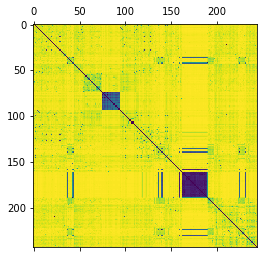

In [5]:
import matplotlib.pyplot as plt
plt.matshow(dist.reshape((244, 244)))
plt.show()
import scipy.misc
scipy.misc.imsave('cosine_similarity.jpg', dist.reshape((244, 244)))
plt.savefig("cosine_similarity.png")
import matplotlib.image as mpimg

img = dist.reshape((244, 244))
#mpimg.imread("src.png")
mpimg.imsave("out.png", img)

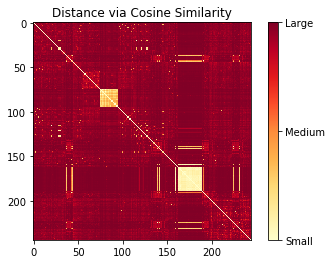

In [16]:
from matplotlib import cm
# Make plot with horizontal colorbar
fig, ax = plt.subplots()

data = dist.reshape((244, 244))

cax = ax.imshow(data, interpolation='nearest', cmap=cm.YlOrRd)#cm.afmhot)
ax.set_title('Distance via Cosine Similarity')

cbar = fig.colorbar(cax, ticks=[0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['Small', 'Medium', 'Large'])  # horizontal colorbar

plt.savefig('cosine_similarity.png')
plt.show()

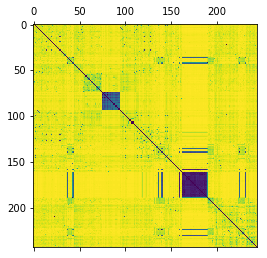

In [63]:
from sklearn.metrics.pairwise import euclidean_distances
dist_eucl = euclidean_distances(X,squared=True)/2.
plt.matshow(dist_eucl.reshape((244, 244)))
plt.show()